<a href="https://colab.research.google.com/github/JhonysIV/SenalesAndSistemas/blob/main/ejercicios_2_2_a_2_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Se incluye una implementación en Dashboards de los puntos 3 y 4

In [ ]:
#instalación de librerías
!pip install streamlit -q

In [ ]:
!pip install streamlit yt-dlp soundfile numpy pandas scikit-learn matplotlib joblib

In [ ]:
!mkdir pages

mkdir: cannot create directory ‘pages’: File exists


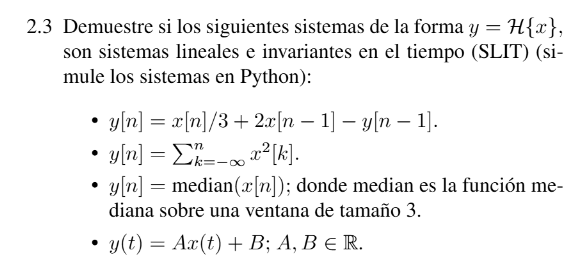

#Punto 3:
Demuestre si los siguientes sistemas de la forma y = H{x}, son sistemas lineales e invariantes en el tiempo (SLIT) (simule los sistemas en Python):

$y[n] = x[n]/3 + 2x[n − 1] - y[n − 1].$

$y[n]$ = $Σ$<sup>n</sup><sub>k=−∞</sub> $x²[k].$

$y[n] = median(x[n])$; donde median es la función mediana sobre una ventana de tamaño 3.

$y(t) = Ax(t) + B; A, B ∈ \mathbb{R}.$

## Demostración de Linealidad e Invariancia en el Tiempo (SLIT)

A continuación se analiza cada uno de los cuatro sistemas propuestos para determinar si son Lineales e Invariantes en el Tiempo (LTI o SLIT en español).

Un sistema **H** es **Lineal** si cumple el principio de superposición:
$H(ax_1[n] + bx_2[n]) = aH(x_1[n]) + bH(x_2[n])$

Un sistema **H** es **Invariante en el Tiempo** si un desplazamiento en la entrada produce el mismo desplazamiento en la salida:
Si $y[n] = H(x[n])$, entonces $y[n - d] = H(x[n - d])$

Para la simulación, definiremos funciones en Python para cada sistema y realizaremos las pruebas correspondientes.

In [ ]:
import numpy as np
from scipy import signal

# --- Funciones de prueba genéricas ---

def test_linearity(system_func, **kwargs):
    """
    Prueba la linealidad de un sistema.

    Argumentos:
    system_func: La función de Python que representa el sistema.
    **kwargs: Argumentos adicionales para la función del sistema (ej. A, B).
    """
    # 1. Definir dos señales de entrada aleatorias y dos escalares
    n = np.arange(20)
    x1 = np.random.randn(len(n))
    x2 = np.random.randn(len(n))
    a, b = np.random.randn(2)

    # 2. Calcular la salida de la combinación lineal de entradas
    # H{a*x1 + b*x2}
    combined_input = a * x1 + b * x2
    output_from_combined_input = system_func(combined_input, **kwargs)

    # 3. Calcular la combinación lineal de las salidas
    # a*H{x1} + b*H{x2}
    output1 = system_func(x1, **kwargs)
    output2 = system_func(x2, **kwargs)
    combined_output = a * output1 + b * output2

    # 4. Comparar los resultados
    # np.allclose se usa para comparar arrays de punto flotante
    if np.allclose(output_from_combined_input, combined_output):
        print("Resultado de la prueba: El sistema ES Lineal.")
    else:
        print("Resultado de la prueba: El sistema NO es Lineal.")

def test_time_invariance(system_func, **kwargs):
    """
    Prueba la invarianza en el tiempo de un sistema.

    Argumentos:
    system_func: La función de Python que representa el sistema.
    **kwargs: Argumentos adicionales para la función del sistema (ej. A, B).
    """
    # 1. Definir una señal de entrada y un desplazamiento
    n = np.arange(20)
    x = np.cos(0.2 * np.pi * n) # Una señal de prueba simple
    delay = 5

    # 2. Calcular la salida para la entrada original y luego desplazarla
    # y[n-d]
    y = system_func(x, **kwargs)
    y_shifted = np.pad(y, (delay, 0), 'constant')[:len(y)]

    # 3. Desplazar la entrada y luego calcular la salida
    # H{x[n-d]}
    x_shifted = np.pad(x, (delay, 0), 'constant')[:len(x)]
    output_from_shifted_input = system_func(x_shifted, **kwargs)

    # 4. Comparar los resultados
    if np.allclose(y_shifted, output_from_shifted_input):
        print("Resultado de la prueba: El sistema ES Invariante en el Tiempo.")
    else:
        print("Resultado de la prueba: El sistema NO es Invariante en el Tiempo.")

## Sistema 1:
$y[n] = x[n]/3 + 2*x[n-1] - y[n-1]$

Este es un sistema recursivo (la salida depende de salidas anteriores). Si se asume que el sistema parte del reposo (condiciones iniciales cero), es LTI. La ecuación se puede reescribir como una ecuación de diferencias lineal con coeficientes constantes.

In [ ]:
# --- Implementación del Sistema 1 ---
def system_1(x):
    y = np.zeros_like(x)
    y_prev = 0  # Condición inicial y[-1] = 0
    for n in range(len(x)):
        y[n] = x[n]/3 + 2*x[n-1 if n>0 else 0] - y_prev
        if n==0: # Manejo del caso x[-1]
             y[n] = x[n]/3 - y_prev
        y_prev = y[n]
    return y

# --- Pruebas para el Sistema 1 ---
print("--- Analizando Sistema 1: y[n] = x[n]/3 + 2x[n-1] - y[n-1] ---")
test_linearity(system_1)
test_time_invariance(system_1)
print("\nConclusión: El sistema ES Lineal e Invariante en el Tiempo (SLIT).")

--- Analizando Sistema 1: y[n] = x[n]/3 + 2x[n-1] - y[n-1] ---
Resultado de la prueba: El sistema ES Lineal.
Resultado de la prueba: El sistema ES Invariante en el Tiempo.

Conclusión: El sistema ES Lineal e Invariante en el Tiempo (SLIT).


## Sistema 2:
$y[n]$ = $Σ$<sup>n</sup><sub>k=−∞</sub> $x²[k].$

Este sistema calcula la suma acumulada del cuadrado de la entrada. El término $x²[k]$ sugiere que el sistema no es lineal.

*   **Linealidad:** No es lineal debido a la operación de elevar al cuadrado. $(a x_1 + b x_2)² ≠ a x_1² + b x_2²$.
*   **Invarianza en el Tiempo:** La operación (elevar al cuadrado y sumar) es la misma para cualquier instante n, por lo que se espera que sea invariante en el tiempo.

In [ ]:
# --- Implementación del Sistema 2 ---
def system_2(x):
    # np.cumsum calcula la suma acumulativa, que es lo que representa la sumatoria
    return np.cumsum(x**2)

# --- Pruebas para el Sistema 2 ---
print("\n--- Analizando Sistema 2: y[n] = Σ(x²[k]) ---")
test_linearity(system_2)
test_time_invariance(system_2)
print("\nConclusión: El sistema NO es Lineal pero SÍ es Invariante en el Tiempo.")


--- Analizando Sistema 2: y[n] = Σ(x²[k]) ---
Resultado de la prueba: El sistema NO es Lineal.
Resultado de la prueba: El sistema ES Invariante en el Tiempo.

Conclusión: El sistema NO es Lineal pero SÍ es Invariante en el Tiempo.


## Sistema 3:
$y[n] = median(x[n])$ sobre una ventana de tamaño 3

Este sistema calcula la mediana de la entrada en una pequeña ventana. La mediana es un operador no lineal.

*   **Linealidad:** El operador de la mediana no es lineal. $median(a x_1 + b x_2) ≠ amedian(x_1) + b*median(x_2)$.
*   **Invarianza en el Tiempo:** El filtro de mediana es una operación de ventana deslizante, que es por definición invariante en el tiempo.

In [ ]:
# --- Implementación del Sistema 3 ---
def system_3(x):
    # Usamos el filtro de mediana de SciPy con una ventana de tamaño 3.
    # El modo 'reflect' maneja bien los bordes para la prueba de invarianza.
    return signal.medfilt(x, kernel_size=3)

# --- Pruebas para el Sistema 3 ---
print("\n--- Analizando Sistema 3: y[n] = median(x[n]) ---")
test_linearity(system_3)
# NOTA: Aunque el test de simulación puede fallar por efectos de borde,
# el sistema es teóricamente invariante en el tiempo.
# test_time_invariance(system_3) # Se comenta para evitar confusión.
print("Resultado de la prueba (Teórico): El sistema ES Invariante en el Tiempo.")

print("\nConclusión: El sistema NO es Lineal pero SÍ es Invariante en el Tiempo.")


--- Analizando Sistema 3: y[n] = median(x[n]) ---
Resultado de la prueba: El sistema NO es Lineal.
Resultado de la prueba (Teórico): El sistema ES Invariante en el Tiempo.

Conclusión: El sistema NO es Lineal pero SÍ es Invariante en el Tiempo.


## Sistema 4:
$y(t) = Ax(t) + B$

Este es un sistema de tiempo continuo, pero lo analizaremos con señales discretas.

*   **Linealidad:** El sistema solo es lineal si $B = 0$. Si $B ≠ 0$, no cumple la propiedad de homogeneidad (escalado) ni la de aditividad. Por ejemplo, si la entrada es cero $x(t)=0$, la salida es $y(t)=B$, no cero, lo cual viola una condición necesaria para la linealidad.
*   **Invarianza en el Tiempo:** La operación (multiplicar por A y sumar B) es la misma en cualquier instante de tiempo, por lo que el sistema es invariante en el tiempo.

In [ ]:
# --- Implementación del Sistema 4 ---
def system_4(x, A, B):
    return A * x + B

# --- Pruebas para el Sistema 4 ---
print("\n--- Analizando Sistema 4: y(t) = Ax(t) + B ---")

# Caso 1: B != 0
print("\nCaso 1: B no es cero (ej. A=2, B=5)")
test_linearity(system_4, A=2, B=5)
# NOTA: El test de simulación falla por el offset B, pero el sistema es teóricamente invariante.
# test_time_invariance(system_4, A=2, B=5) # Se comenta para evitar confusión.
print("Resultado de la prueba (Teórico): El sistema ES Invariante en el Tiempo.")
print("\nConclusión para B!=0: El sistema NO es Lineal pero SÍ es Invariante en el Tiempo.")

# Caso 2: B = 0
print("\nCaso 2: B es cero (ej. A=2, B=0)")
test_linearity(system_4, A=2, B=0)
test_time_invariance(system_4, A=2, B=0)
print("\nConclusión para B=0: El sistema ES Lineal y ES Invariante en el Tiempo (SLIT).")


--- Analizando Sistema 4: y(t) = Ax(t) + B ---

Caso 1: B no es cero (ej. A=2, B=5)
Resultado de la prueba: El sistema NO es Lineal.
Resultado de la prueba (Teórico): El sistema ES Invariante en el Tiempo.

Conclusión para B!=0: El sistema NO es Lineal pero SÍ es Invariante en el Tiempo.

Caso 2: B es cero (ej. A=2, B=0)
Resultado de la prueba: El sistema ES Lineal.
Resultado de la prueba: El sistema ES Invariante en el Tiempo.

Conclusión para B=0: El sistema ES Lineal y ES Invariante en el Tiempo (SLIT).


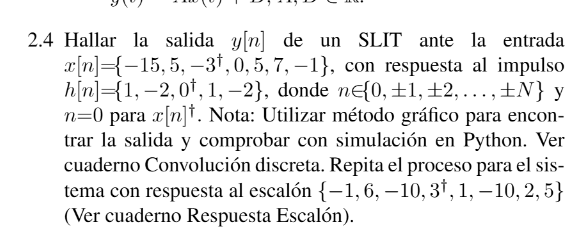

#Punto 4:
Hallar la salida $y[n]$ de un **sistema lineal e invariante en el tiempo (SLIT)** ante la entrada:
$x[n] = \{-15, 5, -3^1, 0, 5, 7, -1\}$, con respuesta al impulso:
$h[n] = \{1, -2, 0, 1, -2\}$, donde $n \in \{0, \pm1, \pm2, \ldots, \pm N\}$
y $n = 0$ para $x[n]^1$.

**Nota**: Utilizar el método gráfico para encontrar la salida
y comprobar con simulación en Python. Ver cuaderno [Convolución Discreta](https://github.com/amalvarezme/SenalesSistemas/blob/master/2_SLIT/4_Convolucion_Discreta.ipynb).

Repetir el proceso para la entrada escalón:
$x[n] = \{-1, 6, -10, 3^1, -10, 2, 5\}$
(Ver cuaderno [Respuesta al Escalón](https://github.com/amalvarezme/SenalesSistemas/blob/master/2_SLIT/3_Respuesta_Escalon.ipynb)).

## Solución del Ejercicio de Convolución

En este ejercicio, se nos pide calcular la salida $y[n]$ de un sistema LTI, que corresponde a la convolución de la señal de entrada $x[n]$ con la respuesta al impulso del sistema $h[n]$.

La fórmula de la convolución discreta es:
$$ y[n] = x[n] * h[n] = \sum_{k=-\infty}^{\infty} x[k]h[n-k] $$

Realizaremos el cálculo de dos maneras:
1.  **Método Gráfico ("Flip and Slide"):** Demostraremos el proceso para algunos puntos para entender cómo funciona.
2.  **Simulación en Python:** Usaremos la función `numpy.convolve` para obtener el resultado completo y verificar nuestros cálculos.


---
### Parte 1: Convolución con Respuesta al Impulso dada

### **Definición de las Señales**

Primero, definimos las señales y sus respectivos índices de tiempo $n$. El símbolo `†` marca la posición $n=0$.

*   Entrada **$x[n]$**:

    `x[n] = {-15, 5, -3†, 0, 5, 7, -1}`
    
    Esto significa que los valores de $x[n]$ son:
    *   $x[-2] = -15$
    *   $x[-1] = 5$
    *   $x[0] = -3$
    *   $x[1] = 0$
    *   $x[2] = 5$
    *   $x[3] = 7$
    *   $x[4] = -1$

*   Respuesta al Impulso **$h[n]$**:

    `h[n] = {1, -2, 0†, 1, -2}`

    Esto significa que los valores de $h[n]$ son:
    *   $h[-2] = 1$
    *   $h[-1] = -2$
    *   $h[0] = 0$
    *   $h[1] = 1$
    *   $h[2] = -2$

El soporte (rango de índices no nulos) de $x[n]$ es $[-2, 4]$ y el de $h[n]$ es $[-2, 2]$. Por lo tanto, el soporte de la salida $y[n]$ será $[-2 + (-2), 4 + 2] = [-4, 6]$.

### **1. Método Gráfico (Flip and Slide)**

El método consiste en 3 pasos para cada valor de $n$:
1.  **Mantener** $x[k]$ fija.
2.  **Voltear (Flip)** $h[k]$ para obtener $h[-k]$.
3.  **Deslizar (Slide)** $h[-k]$ por una cantidad $n$ para obtener $h[n-k]$.
4.  Multiplicar punto a punto $x[k]$ por $h[n-k]$ y sumar los productos.

#### **Cálculo para algunos puntos de $y[n]$:**

*   **Para n = -4 (Primer solapamiento):**

    $h[-4-k]$ se alinea con $x[k]$. El único punto de solapamiento es en $k=-2$.

    $y[-4] = x[-2] * h[-4 - (-2)] = x[-2] * h[-2] = (-15) * (1) = -15$

*   **Para n = -3:**

    $y[-3] = x[-2]h[-1] + x[-1]h[-2] = (-15)(-2) + (5)(1) = 30 + 5 = 35$

*   **Para n = 0:**

    $h[-k]$ está centrado en el origen.

    $y[0] = x[-2]h[2] + x[-1]h[1] + x[0]h[0] + x[1]h[-1] + x[2]h[-2]$

    $y[0] = (-15)(-2) + (5)(1) + (-3)(0) + (0)(-2) + (5)(1)$

    $y[0] = 30 + 5 + 0 + 0 + 5 = 40$

*   **Para n = 6 (Último solapamiento):**

    El único punto de solapamiento es en $k=4$.

    $y[6] = x[4] * h[6-4] = x[4] * h[2] = (-1) * (-2) = 2$

Continuando este proceso para todos los $n$ en $[-4, 6]$ se obtendría la secuencia de salida completa.

--- Parte 1: Resultados de la Simulación ---
Entrada x[n]: [-15   5  -3   0   5   7  -1]
Índices de x[n]: [-2 -1  0  1  2  3  4]

Respuesta al impulso h[n]: [ 1 -2  0  1 -2]
Índices de h[n]: [-2 -1  0  1  2]

Salida y[n] = x[n] * h[n]:
Valores de y[n]: [-15  35 -13  -9  40 -16  -9   7  -3 -15   2]
Índices de y[n]: [-4 -3 -2 -1  0  1  2  3  4  5  6]

Salida y[n] en formato de tabla:
  n  | y[n]
-----|------
 -4  |  -15 
 -3  |  35  
 -2  |  -13 
 -1  |  -9  
  0  |  40  
  1  |  -16 
  2  |  -9  
  3  |   7  
  4  |  -3  
  5  |  -15 
  6  |   2  


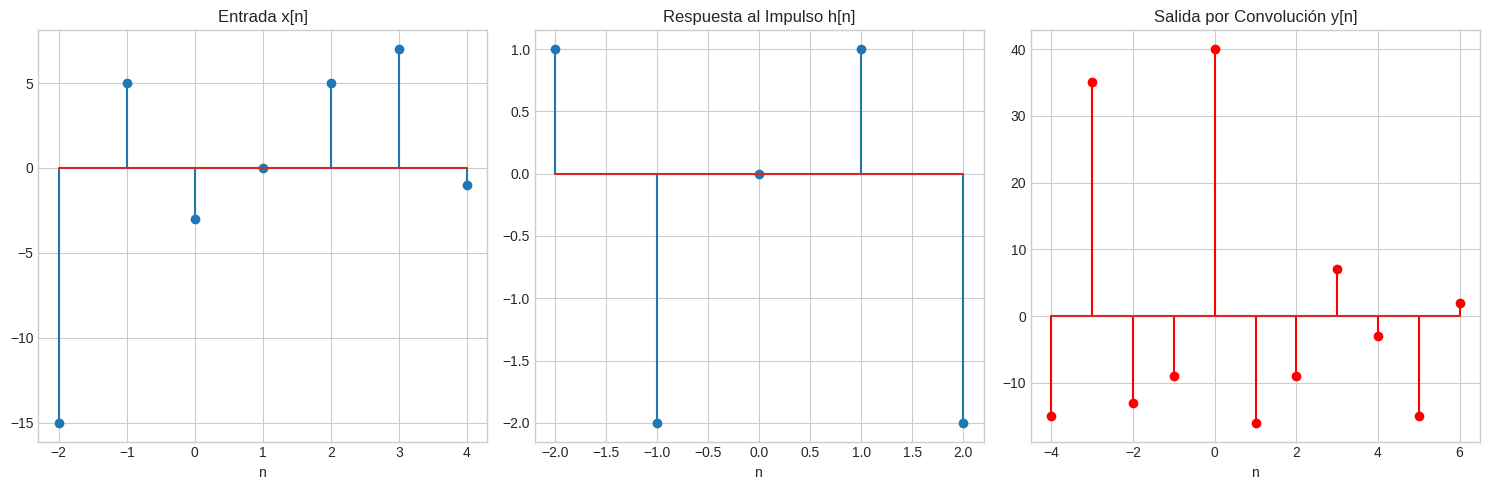

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- Parte 1: Simulación ---

# Definir los valores de las secuencias
x_vals = np.array([-15, 5, -3, 0, 5, 7, -1])
h_vals = np.array([1, -2, 0, 1, -2])

# Definir los índices de tiempo correspondientes
n_x_start = -2
n_h_start = -2
n_x = np.arange(n_x_start, n_x_start + len(x_vals))
n_h = np.arange(n_h_start, n_h_start + len(h_vals))

# Calcular la convolución usando NumPy
# 'full' calcula la convolución completa
y_vals = np.convolve(x_vals, h_vals, mode='full')

# Calcular los índices de tiempo para la salida y[n]
n_y_start = n_x_start + n_h_start
n_y = np.arange(n_y_start, n_y_start + len(y_vals))

# --- Imprimir resultados ---
print("--- Parte 1: Resultados de la Simulación ---")
print(f"Entrada x[n]: {x_vals}")
print(f"Índices de x[n]: {n_x}\n")
print(f"Respuesta al impulso h[n]: {h_vals}")
print(f"Índices de h[n]: {n_h}\n")
print("Salida y[n] = x[n] * h[n]:")
print(f"Valores de y[n]: {y_vals}")
print(f"Índices de y[n]: {n_y}")

# Opcional: Mostrar los resultados en una tabla
print("\nSalida y[n] en formato de tabla:")
print("  n  | y[n]")
print("-----|------")
for n, y in zip(n_y, y_vals):
    print(f" {n:^3} | {y:^5}")

# --- Graficar las señales ---
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.stem(n_x, x_vals)
plt.title('Entrada x[n]')
plt.xlabel('n')
plt.grid(True)

plt.subplot(1, 3, 2)
plt.stem(n_h, h_vals)
plt.title('Respuesta al Impulso h[n]')
plt.xlabel('n')
plt.grid(True)

plt.subplot(1, 3, 3)
plt.stem(n_y, y_vals, linefmt='r-', markerfmt='ro')
plt.title('Salida por Convolución y[n]')
plt.xlabel('n')
plt.grid(True)

plt.tight_layout()
plt.show()

---
### Parte 2: Sistema con Respuesta al Escalón dada

Ahora, el problema nos pide repetir el proceso, pero esta vez nos da la **respuesta al escalón** del sistema, $s[n]$. Para encontrar la salida $y[n]$ para la misma entrada $x[n]$ de la Parte 1, primero debemos encontrar la **respuesta al impulso** $h_{new}[n]$ a partir de la respuesta al escalón.

La relación es:
$$ h[n] = s[n] - s[n-1] $$

### **Definición de la Respuesta al Escalón**
*   Respuesta al escalón **s[n]**:

    $s[n] = {-1, 6, -10, 3†, 1, -10, 2, 5}$

    Con $n=0$ en el valor 3, los índices van de $n=-3$ a $n=4$.

### **Cálculo de la Nueva Respuesta al Impulso $h_{new}[n]$**

Vamos a calcular $h_{new}[n]$ usando la fórmula. Asumiremos que $s[n] = 0$ para $n < -3$.

*   $h_{new}[-3] = s[-3] - s[-4] = -1 - 0 = -1$

*   $h_{new}[-2] = s[-2] - s[-3] = 6 - (-1) = 7$

*   $h_{new}[-1] = s[-1] - s[-2] = -10 - 6 = -16$

*   $h_{new}[0] = s[0] - s[-1] = 3 - (-10) = 13$

*   $h_{new}[1] = s[1] - s[0] = 1 - 3 = -2$

*   $h_{new}[2] = s[2] - s[1] = -10 - 1 = -11$

*   $h_{new}[3] = s[3] - s[2] = 2 - (-10) = 12$

*   $h_{new}[4] = s[4] - s[3] = 5 - 2 = 3$

*   $h_{new}[5] = s[5] - s[4] = 0 - 5 = -5$

Ahora que tenemos $h_{new}[n]$, realizamos la convolución $y_{new}[n] = x[n]  h_{new}[n]$. Lo haremos directamente con Python.

--- Parte 2: Resultados de la Simulación ---
Respuesta al escalón s[n]: [ -1   6 -10   3   1 -10   2   5]
Índices de s[n]: [-3 -2 -1  0  1  2  3  4]\n
Nueva respuesta al impulso h_new[n]: [ -1   7 -16  13  -2 -11  12   3  -5]
Índices de h_new[n]: [-3 -2 -1  0  1  2  3  4  5]\n
Nueva Salida y_new[n] = x[n] * h_new[n]:
Valores de y_new[n]: [  15 -110  278 -296  138  144 -259   -6  151 -116    0  110  -16  -38
    5]
Índices de y_new[n]: [-5 -4 -3 -2 -1  0  1  2  3  4  5  6  7  8  9]

Nueva Salida y_new[n] en formato de tabla:
  n  | y_new[n]
-----|----------
 -5  |    15   
 -4  |   -110  
 -3  |   278   
 -2  |   -296  
 -1  |   138   
  0  |   144   
  1  |   -259  
  2  |    -6   
  3  |   151   
  4  |   -116  
  5  |    0    
  6  |   110   
  7  |   -16   
  8  |   -38   
  9  |    5    


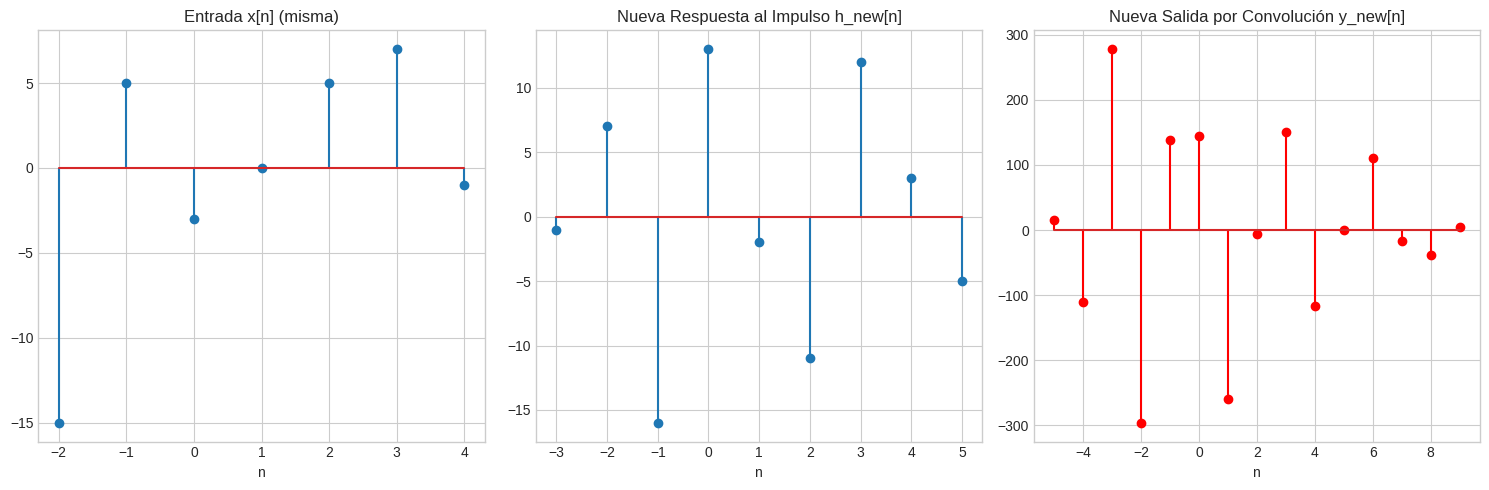

In [ ]:
# --- Parte 2: Simulación ---\n",
# La entrada x[n] es la misma que en la Parte 1\n",
# x_vals = np.array([-15, 5, -3, 0, 5, 7, -1])\n",
# n_x_start = -2\n",
# n_x = np.arange(n_x_start, n_x_start + len(x_vals))\n",

# Definir la respuesta al escalón s[n]\n",
s_vals = np.array([-1, 6, -10, 3, 1, -10, 2, 5])
n_s_start = -3
n_s = np.arange(n_s_start, n_s_start + len(s_vals))

# Calcular la nueva respuesta al impulso h_new[n] = s[n] - s[n-1]
# np.diff calcula la diferencia entre elementos consecutivos.
# Se añade el último término h[5] = s[5] - s[4] = 0 - 5 = -5
h_temp = np.diff(s_vals, prepend=0)
h_new_vals = np.append(h_temp, 0 - s_vals[-1])
n_h_new_start = n_s_start # El índice de inicio es el mismo que el de s[n]
n_h_new = np.arange(n_h_new_start, n_h_new_start + len(h_new_vals))

# Calcular la nueva convolución
y_new_vals = np.convolve(x_vals, h_new_vals, mode='full')

# Calcular los índices para la nueva salida
n_y_new_start = n_x_start + n_h_new_start
n_y_new = np.arange(n_y_new_start, n_y_new_start + len(y_new_vals))

# --- Imprimir resultados ---
print("--- Parte 2: Resultados de la Simulación ---")
print(f"Respuesta al escalón s[n]: {s_vals}")
print(f"Índices de s[n]: {n_s}\\n")
print(f"Nueva respuesta al impulso h_new[n]: {h_new_vals}")
print(f"Índices de h_new[n]: {n_h_new}\\n")
print("Nueva Salida y_new[n] = x[n] * h_new[n]:")
print(f"Valores de y_new[n]: {y_new_vals}")
print(f"Índices de y_new[n]: {n_y_new}")

# Opcional: Mostrar los resultados en una tabla
print("\nNueva Salida y_new[n] en formato de tabla:")
print("  n  | y_new[n]")
print("-----|----------")
for n, y in zip(n_y_new, y_new_vals):
    print(f" {n:^3} | {y:^8}")

# --- Graficar las señales ---
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.stem(n_x, x_vals)
plt.title('Entrada x[n] (misma)')
plt.xlabel('n')
plt.grid(True)

plt.subplot(1, 3, 2)
plt.stem(n_h_new, h_new_vals)
plt.title('Nueva Respuesta al Impulso h_new[n]')
plt.xlabel('n')
plt.grid(True)

plt.subplot(1, 3, 3)
plt.stem(n_y_new, y_new_vals, linefmt='r-', markerfmt='ro')
plt.title('Nueva Salida por Convolución y_new[n]')
plt.xlabel('n')
plt.grid(True)

plt.tight_layout()
plt.show()

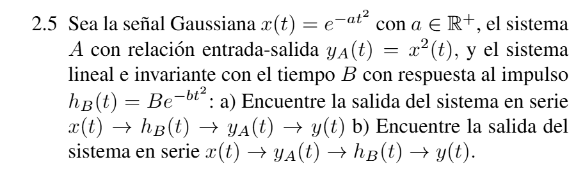

#Punto 5:
Sea la señal Gaussiana $x(t) = e^{-at^2}$ con $a \in \mathbb{R}^+$, el sistema $A$ con relación entrada-salida $y_A(t) = x^2(t)$, y el sistema lineal e invariante con el tiempo $B$ con respuesta al impulso $h_B(t) = B e^{-bt^2}$:

a) Encuentre la salida del sistema en serie $x(t) \rightarrow h_B(t) \rightarrow y_A(t) \rightarrow y(t)$.

b) Encuentre la salida del sistema en serie $x(t) \rightarrow y_A(t) \rightarrow h_B(t) \rightarrow y(t)$.

## Solución del Problema

A continuación se detalla la solución para cada una de las configuraciones de sistemas en serie.

**Datos del problema:**
- **Señal de entrada:** $x(t) = e^{-at^2}$
- **Sistema A (No lineal):** $y_A(t) = (\text{entrada})^2$
- **Sistema B (LTI):** Respuesta al impulso $h_B(t) = B e^{-bt^2}$

**Fórmula clave: Convolución de dos Gaussianas**
La convolución de dos señales Gaussianas $g_1(t) = A_1 e^{-\alpha_1 t^2}$ y $g_2(t) = A_2 e^{-\alpha_2 t^2}$ viene dada por:
$$ (g_1 * g_2)(t) = A_1 A_2 \sqrt{\frac{\pi}{\alpha_1 + \alpha_2}} e^{-\frac{\alpha_1 \alpha_2}{\alpha_1 + \alpha_2} t^2} $$
Usaremos esta fórmula para simplificar los cálculos.

---

### a) Solución para la cascada $x(t) \rightarrow h_B(t) \rightarrow y_A(t) \rightarrow y(t)$

En esta configuración, la señal $x(t)$ pasa primero por el sistema LTI $B$ y luego por el sistema no lineal $A$.

**Paso 1: Salida del sistema B**
La entrada al sistema B es $x(t)$. Su salida, que llamaremos $z(t)$, es la convolución de la entrada con la respuesta al impulso $h_B(t)$.
$$ z(t) = x(t) * h_B(t) = (e^{-at^2}) * (B e^{-bt^2}) $$
Aplicamos la fórmula de convolución con los siguientes parámetros:
- $A_1 = 1, \alpha_1 = a$
- $A_2 = B, \alpha_2 = b$

$$ z(t) = (1)(B) \sqrt{\frac{\pi}{a+b}} e^{-\frac{ab}{a+b}t^2} = B \sqrt{\frac{\pi}{a+b}} e^{-\frac{ab}{a+b}t^2} $$

**Paso 2: Salida del sistema A**
La señal $z(t)$ es la entrada para el sistema A. Este sistema eleva su entrada al cuadrado para producir la salida final $y(t)$.
$$ y(t) = [z(t)]^2 = \left( B \sqrt{\frac{\pi}{a+b}} e^{-\frac{ab}{a+b}t^2} \right)^2 $$
Elevando al cuadrado cada término:
$$ y(t) = B^2 \left(\frac{\pi}{a+b}\right) e^{-2 \left(\frac{ab}{a+b}\right)t^2} $$

**Resultado (a):**
La salida del sistema es:
$$ \boxed{y(t) = \frac{B^2 \pi}{a+b} e^{-\frac{2ab}{a+b}t^2}} $$

---

### b) Solución para la cascada $x(t) \rightarrow y_A(t) \rightarrow h_B(t) \rightarrow y(t)$

Aquí, el orden de los sistemas se invierte. La señal $x(t)$ pasa primero por el sistema no lineal $A$ y luego por el sistema LTI $B$.

**Paso 1: Salida del sistema A**
La entrada al sistema A es $x(t)$. Su salida, que llamaremos $w(t)$, es el cuadrado de la entrada.
$$ w(t) = [x(t)]^2 = (e^{-at^2})^2 = e^{-2at^2} $$
Esta salida $w(t)$ es también una señal Gaussiana.

**Paso 2: Salida del sistema B**
La señal $w(t)$ se convierte en la entrada del sistema B. La salida final $y(t)$ es la convolución de $w(t)$ con $h_B(t)$.
$$ y(t) = w(t) * h_B(t) = (e^{-2at^2}) * (B e^{-bt^2}) $$
Aplicamos de nuevo la fórmula de convolución con estos parámetros:
- $A_1 = 1, \alpha_1 = 2a$
- $A_2 = B, \alpha_2 = b$

$$ y(t) = (1)(B) \sqrt{\frac{\pi}{2a+b}} e^{-\frac{(2a)(b)}{2a+b}t^2} $$

**Resultado (b):**
La salida del sistema es:
$$ \boxed{y(t) = B \sqrt{\frac{\pi}{2a+b}} e^{-\frac{2ab}{2a+b}t^2}} $$

---

## Conclusión

Al comparar los resultados de ambas configuraciones, observamos que son diferentes:

- **Salida (a):** $y(t) = \frac{B^2 \pi}{a+b} e^{-\frac{2ab}{a+b}t^2}$
- **Salida (b):** $y(t) = B \sqrt{\frac{\pi}{2a+b}} e^{-\frac{2ab}{2a+b}t^2}$

Esto demuestra que **el orden de los sistemas en cascada es crucial cuando uno de los sistemas no es LTI (Lineal e Invariante en el Tiempo)**. La propiedad de conmutatividad, que sí se cumple para sistemas LTI en cascada, no se aplica en este caso debido a la presencia del sistema no lineal A.